In [1]:
import os
os.getcwd()

'c:\\Users\\warne\\OneDrive\\Documenten\\My Git Repo\\Work'

In [2]:
# Getting necessary packages.
import pandas as pd
import numpy as np

# Getting the data.
file_handler = open("Telco Churn Dataset.csv", "r")
data = pd.read_csv(file_handler)
file_handler.close()

# Having a first look at the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Checking the first 5 entries.
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Proper capitalization of variable names
data.rename(columns={'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'}, inplace=True)

# Change the variable format, set any errors to NaN (Not a Number).
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce', downcast='integer')

# Drop missing NaN values
data.dropna(inplace=True)

# Changing 1 and 0 to Yes and No
data['SeniorCitizen'].replace({0:'No',1:'Yes'}, inplace=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


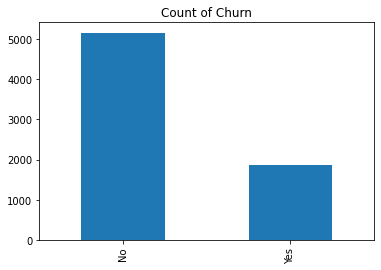

In [5]:
# Plotting non-churners versus churners.
data['Churn'].value_counts().plot.bar(title='Count of Churn')

# How big is the churn proportion in percentages?
print(data.Churn.value_counts(normalize=True))

<AxesSubplot:>

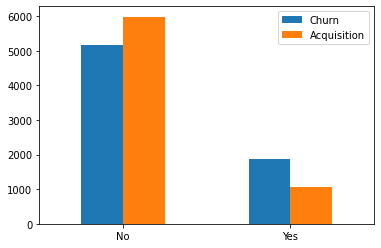

In [6]:
# Finding acquisition in Q3.
data.Acquisition = (data['Tenure'] <= 3)

# Creating a churn to acquisition table to then plot the data.
Churn = data.Churn.value_counts().values
Acquisition = data.Acquisition.value_counts().values
index = ['No', 'Yes']
pd.DataFrame({'Churn':Churn, 'Acquisition':Acquisition}, index=index).plot.bar(rot=0)

In [7]:
# Counting unique values per column.
for column in data.columns:
    print(column + ':' + str(data[column].nunique()))
    print(data[column].unique())
    print('-'*40)

CustomerID:7032
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Gender:2
['Female' 'Male']
----------------------------------------
SeniorCitizen:2
['No' 'Yes']
----------------------------------------
Partner:2
['Yes' 'No']
----------------------------------------
Dependents:2
['No' 'Yes']
----------------------------------------
Tenure:72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
----------------------------------------
PhoneService:2
['No' 'Yes']
----------------------------------------
MultipleLines:3
['No phone service' 'No' 'Yes']
----------------------------------------
InternetService:3
['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity:3
['No' 'Yes' 'No internet service']
----------------------

In [8]:
# Grouping variables.
dependent   = ['Churn']
identifier  = ['CustomerID']
numerical   = ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical = [col for col in data.columns if col not in numerical + dependent + identifier]

# Grouping add-on sub-groups.
internet_add_on = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phone_add_on = ['MultipleLines']

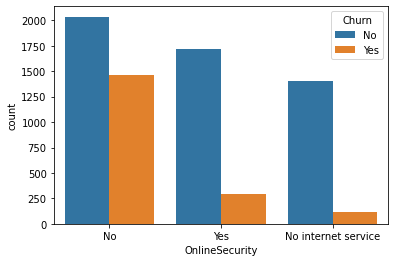

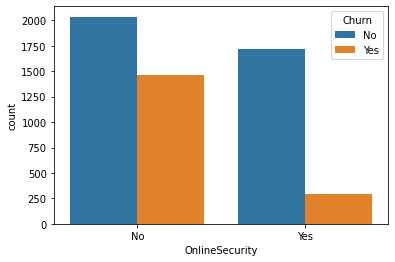

In [10]:
# importing visual packages.
import matplotlib.pyplot as plt
import seaborn as sns
# Showing two countplots: Before and After
sns.countplot(data=data, x='OnlineSecurity', hue='Churn')
plt.show()
sns.countplot(data=data[data['OnlineSecurity'] != 'No internet service'], x='OnlineSecurity', hue='Churn')
plt.show()

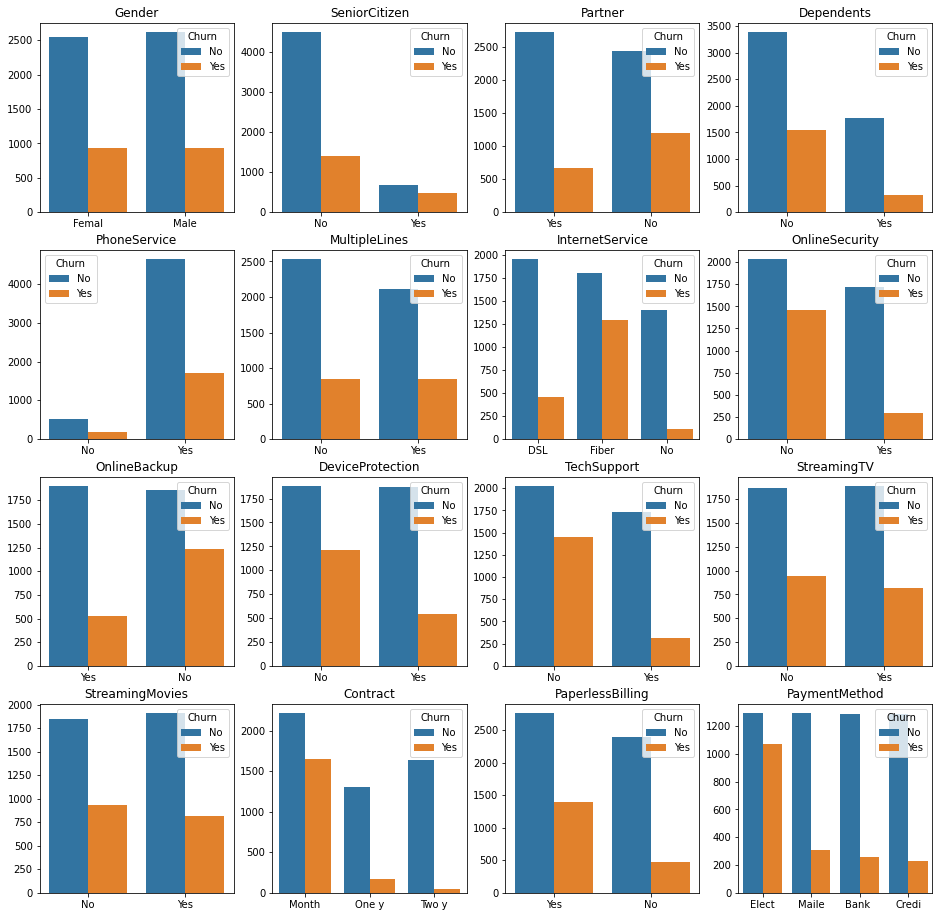

In [11]:
# We have 16 categorical variables so a 4 by 4 matrix is nice.
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (16, 16))
# Selecting and plotting the data, inputting them into the matrix.
for i, item in enumerate(categorical):
    if item in internet_add_on: 
        df = data[data['InternetService'] != 'No']
    elif item in phone_add_on: 
        df = data[data['PhoneService'] != 'No']
    else: df = data
    if i < 4:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[0, i])
    elif i >=4 and i < 8:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[1, i-4])
    elif i >=8 and i < 12:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[2, i-8])
    elif i < 16:
        ax = sns.countplot(data=df, x=item, hue='Churn',
        ax=axes[3, i-12])
# Limiting characters to 5 and setting the title on top.
    ax.set_title(item)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels(item.get_text()[:5] for item in
    ax.get_xticklabels())

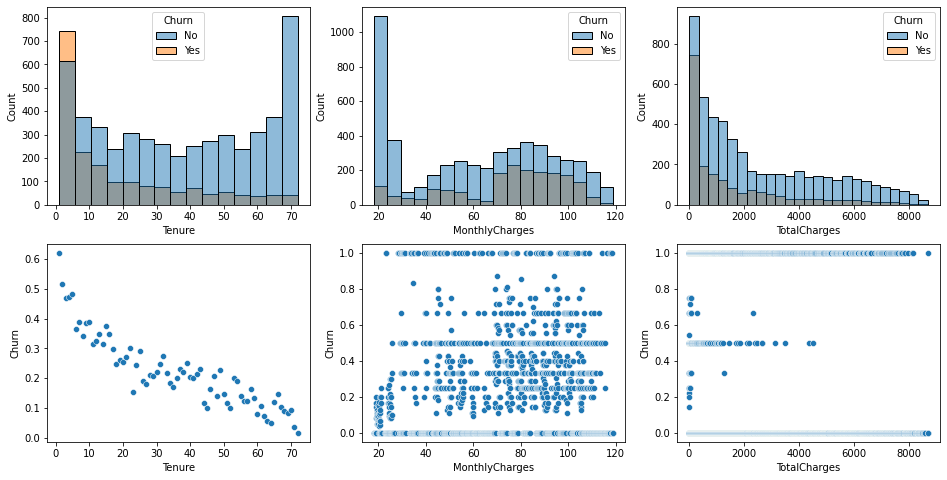

In [12]:
# Histogram and scatterplot, 3 numerical variables, 2 by 3 matrix.
fig, axes = plt.subplots(nrows = 2, ncols = 3,figsize = (16, 8))
# Selecting and plotting the data, inputting them into the matrix.
for i, item in enumerate(numerical + numerical):
    if i < 3:
        sns.histplot(data[numerical + dependent], x=item,
        hue='Churn', ax=axes[0, i])
    elif i >= 3 and i < 6:
        df = data[numerical + dependent]
        df.replace({'Yes':1, 'No':0}, inplace=True)
        df = df.groupby(item).Churn.mean().reset_index()
        sns.scatterplot(data = df, x=item, y='Churn', 
        ax=axes[1, i-3])